In [17]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
arquivo_raster = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/4_Códigos/Qualificação/h_max_1.34953e+08_pacote100_270824.tif'

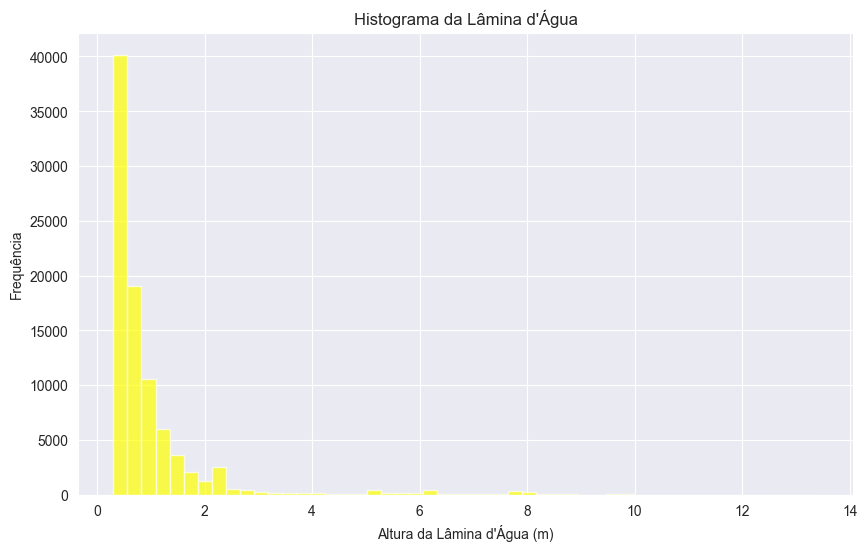

    Intervalo Inferior (m)  Intervalo Superior (m)  Frequência
0                 0.300000                0.562138       40160
1                 0.562138                0.824275       19092
2                 0.824275                1.086413       10589
3                 1.086413                1.348551        5990
4                 1.348551                1.610688        3647
5                 1.610688                1.872826        2109
6                 1.872826                2.134964        1211
7                 2.134964                2.397101        2531
8                 2.397101                2.659239         562
9                 2.659239                2.921376         470
10                2.921376                3.183514         288
11                3.183514                3.445652         150
12                3.445652                3.707789         176
13                3.707789                3.969927         127
14                3.969927                4.232064     

In [25]:
# Definindo o limite de altura
limite_minimo = 0.3 # em metros
limite_maximo = 15 # em metros

# Número de intervalos (bins) do histograma
numero_bins = 50

# Abrindo o arquivo raster
with rasterio.open(arquivo_raster) as src:
    # Lendo a primeira banda do raster
    banda1 = src.read(1)

    # Obtendo o valor "NoData" do raster
    no_data_value = src.nodata
    
    # Criando uma máscara para filtrar os valores "NoData"
    if no_data_value is not None:
        mask = banda1 != no_data_value
        banda1 = banda1[mask]

    #Filtrando os valores acima de 30 cm
    banda1_filtrada = banda1[(banda1 >= limite_minimo) & (banda1 <= limite_maximo)]

    # Criando o histograma
    plt.figure(figsize=(10, 6))
    plt.hist(banda1_filtrada.flatten(), bins=numero_bins, color='yellow', alpha=0.7)
    plt.title('Histograma da Lâmina d\'Água')
    plt.xlabel('Altura da Lâmina d\'Água (m)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()
    
    # Gerando o histograma
    counts, bin_edges = np.histogram(banda1_filtrada, bins=numero_bins)
    
    # Criando a tabela com os dados do histograma
    tabela_histograma = pd.DataFrame({
        'Intervalo Inferior (m)': bin_edges[:-1],
        'Intervalo Superior (m)': bin_edges[1:],
        'Frequência': counts
    })

    # Exibindo a tabela
    print(tabela_histograma)

In [10]:
# Remover valores de no data se houver
no_data_value = src.nodata
if no_data_value is not None:
    raster = np.ma.masked_equal(raster, no_data_value)

In [12]:
# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(raster.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histograma da Lâmina d\'Água')
plt.xlabel('Altura da Lâmina d\'Água (m)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

NameError: name 'raster' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Carregar a imagem raster
dataset_raster = rasterio.open(arquivo_raster)
dataset_raster.meta
# Ajustar o sistema de coordendas da rede
edges2_proj_utm = edges2_proj.to_crs(epsg=31983)
edges2_proj_utm.crs
import rasterio
import numpy as np

# Carregar o raster
with rasterio.open(arquivo_raster) as src:
    raster = src.read(1)
    raster_transform = src.transform



# Calcular estatísticas descritivas
mean_value = np.mean(raster)
median_value = np.median(raster)
std_dev = np.std(raster)
min_value = np.min(raster)
max_value = np.max(raster)
percentiles = np.percentile(raster, [25, 50, 75])

# Exibir os resultados
print(f'Média: {mean_value}')
print(f'Mediana: {median_value}')
print(f'Desvio Padrão: {std_dev}')
print(f'Valor Mínimo: {min_value}')
print(f'Valor Máximo: {max_value}')
print(f'Percentil 25: {percentiles[0]}')
print(f'Percentil 50: {percentiles[1]}')
print(f'Percentil 75: {percentiles[2]}')

# TODO Calcular a média sem os no-value
import geopandas as gpd
import rasterio
from shapely.geometry import box
from shapely.ops import split
import multiprocessing

# Carregar o raster
raster = rasterio.open(arquivo_raster)
'''
# Obter as dimensões do raster
ncols, nrows = raster.width, raster.height
xmin, ymin, xmax, ymax = raster.bounds
xres = (xmax - xmin) / ncols
yres = (ymax - ymin) / nrows

# Criar uma lista de polígonos representando os pixels do raster
polygons = []
for i in range(nrows):
    for j in range(ncols):
        x1 = xmin + j * xres
        x2 = x1 + xres
        y1 = ymax - i * yres
        y2 = y1 - yres
        polygons.append(box(x1, y1, x2, y2))

# Criar um GeoDataFrame a partir dos polígonos
grid_gdf = gpd.GeoDataFrame({'geometry': polygons}, crs=edges2.crs)
'''
'''
def segment_line_with_grid(line, grid):
    segments = []
    for polygon in grid.geometry:
        intersection = line.intersection(polygon)
        if not intersection.is_empty:
            if intersection.geom_type == 'LineString':
                segments.append((intersection, polygon))
            elif intersection.geom_type == 'MultiLineString':
                for seg in intersection:
                    segments.append((seg, polygon))
    return segments
    '''
'''def process_line_chunks(lines_chunk, grid_gdf):
    segmented_lines = []
    for line in lines_chunk:
        segmented_lines.extend(segment_line_with_grid(line, grid_gdf))
    return segmented_lines

# Função para dividir o GeoDataFrame em chunks
def chunkify(df, n):
    return [df[i::n] for i in range(n)]

# Dividir as linhas em chunks
num_cores = multiprocessing.cpu_count()
chunks = chunkify(edges2_proj_utm.geometry, num_cores)

# Criar um pool de processos e processar os chunks
with multiprocessing.Pool(num_cores) as pool:
    results = pool.starmap(process_line_chunks, [(chunk, grid_gdf) for chunk in chunks])

# Combinar os resultados dos chunks
segmented_lines = [item for sublist in results for item in sublist]

# Criar um novo GeoDataFrame com as linhas segmentadas
segmented_geometries = [seg[0] for seg in segmented_lines]
segmented_values = [seg[1].value for seg in segmented_lines]
segmented_gdf = gpd.GeoDataFrame({'geometry': segmented_geometries, 'value': segmented_values}, crs=edges2_proj_utm.crs)

'''
'''
# Intersectar a rede viária com os polígonos do grid
segmented_roads = gpd.overlay(edges2_proj_utm, grid_gdf, how='intersection')

# Garantir que as linhas segmentadas não se transformem em polígonos
segmented_roads = segmented_roads.explode(index_parts=False).reset_index(drop=True)'''
import geopandas as gpd
from shapely.geometry import LineString, MultiLineString


def redistribute_vertices(geom, distance):
    if geom.geom_type == 'LineString':
        num_vert = int(round(geom.length / distance))
        if num_vert == 0:
            num_vert = 1
        return LineString(
            [geom.interpolate(float(n) / num_vert, normalized=True)
             for n in range(num_vert + 1)])
    elif geom.geom_type == 'MultiLineString':
        parts = [redistribute_vertices(part, distance)
                 for part in geom]
        return type(geom)([p for p in parts if not p.is_empty])
    else:
        raise ValueError('unhandled geometry %s', (geom.geom_type,))


def segmentize_gdf(gdf, distance):
    new_geometries = []
    new_attributes = []

    for idx, row in gdf.iterrows():
        geom = row.geometry
        attributes = row.drop('geometry')

        redistributed = redistribute_vertices(geom, distance)

        if redistributed.geom_type == 'LineString':
            for i in range(len(redistributed.coords) - 1):
                segment = LineString([redistributed.coords[i], redistributed.coords[i + 1]])
                new_geometries.append(segment)
                new_attributes.append(attributes)
        elif redistributed.geom_type == 'MultiLineString':
            for part in redistributed:
                for i in range(len(part.coords) - 1):
                    segment = LineString([part.coords[i], part.coords[i + 1]])
                    new_geometries.append(segment)
                    new_attributes.append(attributes)

    new_gdf = gpd.GeoDataFrame(new_attributes, geometry=new_geometries, crs=gdf.crs)
    return new_gdf


import time

start_time = time.time()
# Segmentar a rede viária em intervalos de 10m
segmented_edges2 = segmentize_gdf(edges2_proj_utm, 10)
end_time = time.time()

execution_time = end_time - start_time
print(f'Segmentized edges2: {execution_time:.2f} segundos')
print(f'O total de linhas originais é {edges2_proj_utm.shape[0]} linhas')
print(f'Já o método de quebra produziu {segmented_edges2.shape[0]} linhas')
import geopandas as gpd
from shapely.geometry import Point, LineString


def extract_nodes_from_segments(gdf):
    nodes = set()
    for line in gdf.geometry:
        coords = list(line.coords)
        nodes.add(Point(coords[0]))
        nodes.add(Point(coords[-1]))
    return list(nodes)


# Extraímos os nós dos segmentos da rede segmentada
nodes = extract_nodes_from_segments(segmented_edges2)

# Criar um GeoDataFrame para os nós
nodes_gdf = gpd.GeoDataFrame(geometry=nodes, crs=segmented_edges2.crs)


def create_edges_from_segments(gdf):
    edges = []
    for idx, row in gdf.iterrows():
        line = row['geometry']
        coords = list(line.coords)
        start_node = Point(coords[0])
        end_node = Point(coords[-1])
        edge_attributes = row.drop('geometry').to_dict()  # Excluir a geometria para adicionar os atributos restantes
        edge_attributes['geometry'] = line  # Adicionar a geometria novamente como shapely object
        edge_attributes['start'] = start_node  # Adicionar o nó de início
        edge_attributes['end'] = end_node  # Adicionar o nó de término
        edges.append(edge_attributes)
    return edges


# Criar arestas a partir dos segmentos da rede segmentada
edges = create_edges_from_segments(segmented_edges2)

# Criar um GeoDataFrame para as arestas com todos os atributos de segmented_edges2
edges_gdf = gpd.GeoDataFrame(
    edges,  # A lista de dicionários de atributos
    geometry='geometry',
    crs=segmented_edges2.crs
)

# Verificar se os atributos foram transferidos corretamente
print(edges_gdf.info())
import matplotlib.pyplot as plt

# Criar uma figura para plotar os nós e as arestas
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar as arestas
edges_gdf.plot(ax=ax, color='red', linewidth=0.5, label='Arestas')

# Plotar os nós
nodes_gdf.plot(ax=ax, color='yellow', markersize=10, label='Nós')

# Adicionar título e legenda
ax.set_title('Rede de Nós e Arestas da Rede Segmentada')
ax.legend()

# Ajustar a visualização
ax.set_axis_off()

plt.tight_layout()
plt.show()

# Identificar os componentes fortemente conectados (SCCs)
sccs = list(nx.strongly_connected_components(G3))

# Encontrar a maior SCC com base no número de nós
largest_scc = max(sccs, key=len)

# Criar um subgrafo contendo apenas a maior SCC
subgraph_scc = G3.subgraph(largest_scc)

'''
import matplotlib.pyplot as plt

# Função para desenhar o grafo
def plot_graph(G, ax, node_color='yellow', node_size=10, edge_color='black', edge_linewidth=0.5):
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, ax=ax, node_color=node_color, node_size=node_size,
            edge_color=edge_color, width=edge_linewidth, with_labels=False)

# Criar uma figura e eixos para plotar os grafos
fig, ax = plt.subplots(figsize=(15, 8))

# Plotar o grafo original
plot_graph(G3, ax=ax, node_color='yellow', node_size=00, edge_color='yellow', edge_linewidth=0.5)

# Plotar o subgrafo da maior SCC
plot_graph(subgraph_scc, ax=ax, node_color='red', node_size=0, edge_color='red', edge_linewidth=1.0)

# Adicionar título ao plot
fig.suptitle("Rede Segmentada Sobreposta à Maior SCC", fontsize=16)

# Adicionar uma legenda manualmente
yellow_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Rede Original')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Maior SCC')

# Colocar a legenda no gráfico
plt.legend(handles=[yellow_patch, red_patch], loc='upper right')

# Mostrar o plot
plt.show()
'''
# Criar o plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o raster
show(dataset_raster, ax=ax, cmap='viridis', alpha=0.9)

# Plotar a rede viária
edges_gdf.plot(ax=ax, color='lightgray')

# Configurar título e eixos
ax.set_title('Rede Viária sobre Raster de Alagamento')
plt.show()
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# Definir os limites para o zoom (em coordenadas EPSG:31983)
# Substitua estes valores pelos limites desejados
zoom_min_x = 347500  # Coordenada mínima x
zoom_max_x = 350500  # Coordenada máxima x
zoom_min_y = 7389500  # Coordenada mínima y
zoom_max_y = 7392000  # Coordenada máxima y

# Criar o plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o raster
show(dataset_raster, ax=ax, cmap='viridis', alpha=0.9)

# Adicionar contornos
#contours = ax.contour(dataset_raster, levels=np.arange(0,9, 1), colors='black')
#ax.clabel(contours, inline=True, fontsize=8)

# Plotar a rede viária
edges_gdf.plot(column='speed_kph_maparadar', ax=ax, cmap='viridis')

# Ajustar os limites dos eixos para dar zoom
ax.set_xlim(zoom_min_x, zoom_max_x)
ax.set_ylim(zoom_min_y, zoom_max_y)

# Configurar título e eixos
ax.set_title('Rede Viária sobre Raster de Alagamento com Zoom')
plt.show()

# TODO tentar segmentar a rede pelo tamanho pixel (FEITO)